# <center>For this project, we use the [FCI@AI CNN, NSL-KDD, Multi-class, 2022 notebook for preprocessing the dataset](https://www.kaggle.com/code/lionsai/cnn-nsl-kdd-multi-class-2022) with some modifications</center> 

# **Imports**

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense, Conv1D, Conv2D, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
from keras.utils.vis_utils import plot_model

# Additional imports not included in the authors notebook

In [25]:
from pycaret.classification import *
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier
from sklearn.utils.multiclass import type_of_target
import torch
import xgboost
import plotly.express as px

## Reading Data

In [16]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

In [17]:
train='KDDTrain+.txt'
test='KDDTest+.txt'
test21='KDDTest-21.txt'
train_data=pd.read_csv(train,names=feature)
# test_data=pd.read_csv(test,names=feature)

In [18]:
# test_21 = pd.read_csv(test21, names= feature)

In [19]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [20]:
# remove attribute 'difficulty_level'
train_data.drop(['difficulty'],axis=1,inplace=True)
train_data.shape

(125973, 42)

## Data Type Checking and Statistical Reports

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [22]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [23]:
# number of attack labels 
train_data['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

# **Data Analysis**


*   Data Visualization
*   Data Mining



### Label

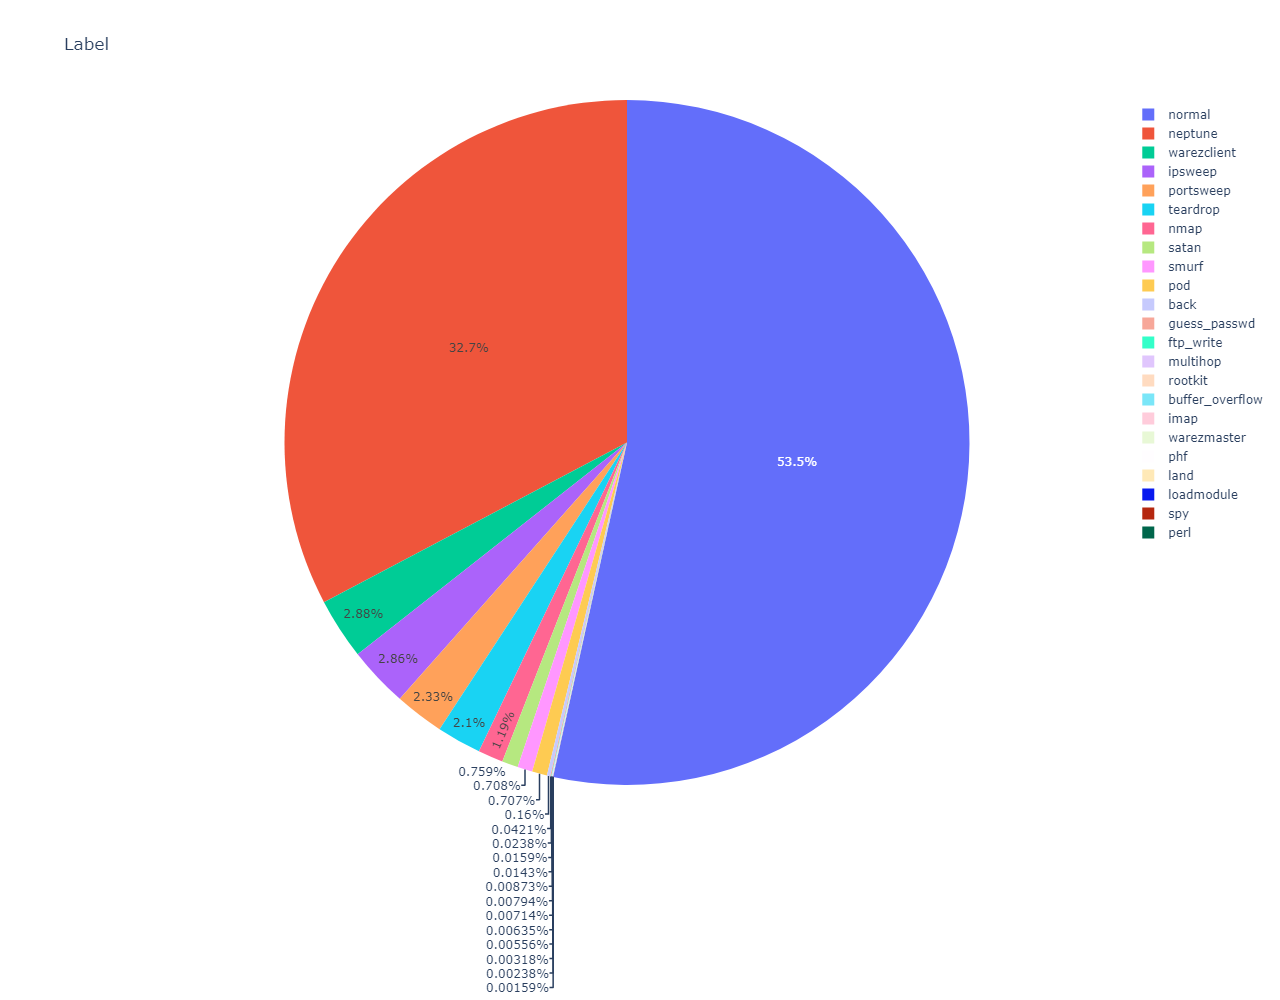

In [27]:
# Distribution of attack labels 
fig = px.pie(train_data, values=train_data['label'].value_counts(), names=train_data['label'].unique(), title='Label',width = 1000, height = 1000)
fig.show()

In [29]:
# The original code below categorized the datasets attack label into various attack groups
# For our project, we are doing binary classification. That is our model will only predict 1 of 2, which means we'll need to edit this code
"""
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)
"""

# Here we change the original function to categorize all attack labels into the attack group
# This leaves only 'normal' and 'attack' in our 'labels' category
def change_label(df):
  df.label.replace(['back','land','neptune','pod','smurf','teardrop', 
                     'guess_passwd','imap','ftp_write','multihop','phf','spy','warezclient','warezmaster',
                     'ipsweep','nmap','portsweep','satan',
                     'buffer_overflow','loadmodule','perl','rootkit'
                     ],'Attack',inplace=True)

In [30]:
change_label(train_data)

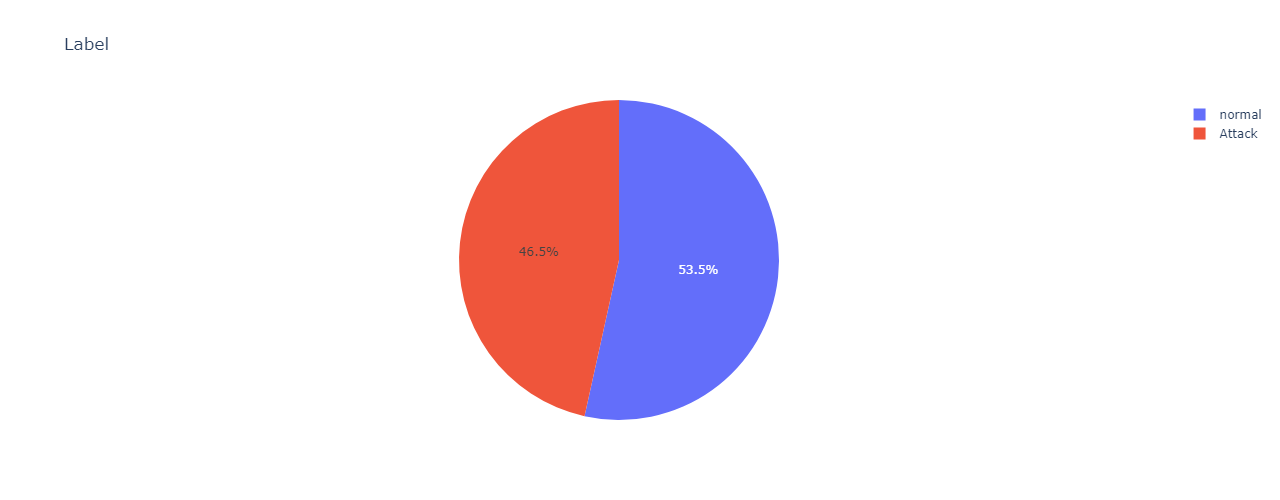

In [31]:
# distribution of normal and attack
fig = px.pie(train_data, values=train_data['label'].value_counts(), names=train_data['label'].unique(), title='Label',width = 500, height = 500)
fig.show()

### Protocol

In [32]:
# creating a dataframe with multi-class labels (normal and attack)
multi_data = train_data.copy()
multi_label = pd.DataFrame(multi_data.label)


In [33]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def standardization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

numeric_col = multi_data.select_dtypes(include='number').columns
data = standardization(multi_data,numeric_col)

In [34]:
# label encoding (0,1) multi-class labels (normal, attack)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label
#y_mul = multi_data['intrusion']
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal,1
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,1
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Attack,0
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal,1
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Attack,0
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,1
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,normal,1
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.094207,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Attack,0


In [35]:
multi_data.drop(labels= ['label'], axis=1, inplace=True)
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,1
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,1
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.773724,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,1
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.972455,-1.094207,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0


In [36]:
# one-hot-encoding
multi_data = pd.get_dummies(multi_data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")  
multi_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,1,0,0,0,0,0
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,1,0,0,0,0,0
125969,-0.107178,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
125970,-0.110249,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
125971,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,1,0,0,0,0,0


In [37]:
y_train_multi= multi_data[['intrusion']]
X_train_multi= multi_data.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_multi.shape,'\ny_train has shape:',y_train_multi.shape)

X_train has shape: (125973, 122) 
y_train has shape: (125973, 1)


In [38]:
from sklearn.preprocessing import LabelBinarizer

y_train_multi = LabelBinarizer().fit_transform(y_train_multi)
y_train_multi

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [39]:
X_train_multi=np.array(X_train_multi)
y_train_multi=np.array(y_train_multi)


In [40]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_train_multi,y_train_multi, test_size=0.20, random_state=42)

In [41]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(100778, 122, 1)

In [42]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(25195, 122, 1)

## Once again, credit to https://www.kaggle.com/code/lionsai/cnn-nsl-kdd-multi-class-2022 for the preprocessing code

## Creating the Neural Network

In [43]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self, num_inputs=122, num_units_d1=200, num_units_d2=100):
        super(Net, self).__init__()
        self.dense0 = nn.Linear(num_inputs, num_units_d1)    # Creating first layer [122 -> 200]
        self.nonlin = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.dense1 = nn.Linear(num_units_d1, num_units_d2)  # Creating the hidden layer [200 -> 100]
        self.output = nn.Linear(num_units_d2, 2)             # Creating the output layer [100 -> 2]
        self.softmax = nn.Softmax(dim=-1)
    def forward(self, X, **kwargs):
        X = self.nonlin(self.dense0(X))
        X = self.dropout(X)
        X = self.nonlin(self.dense1(X))
        X = self.softmax(self.output(X))
        return X

In [44]:
from skorch import NeuralNetClassifier

# Instantiating the model using Skorch classifier
net = NeuralNetClassifier(
    module=Net,
    max_epochs=30,
    lr=0.1,
    batch_size=5000,
    train_split=None
)

In [45]:
from skorch.helper import DataFrameTransformer
# Creating the pipeline will allow us to feed the data into PyCaret
nn_pipe = Pipeline(
    [
        ("transform", DataFrameTransformer()),
        ("net", net),
    ]
)

## Preliminary Evaluations with PyCaret

In [46]:
# Using PyCaret, we will create models across popular classification methods

# We start by create additional variables holding the original, preprocessed training sets
X_train_2 = X_train
X_test_2 = X_test
y_train_tensor = y_train.astype(torch.LongTensor) # Casting y_train as a tensor so that it is compatible

# We reshape X_train_2 to a 2d array and y_train_tensor to a 1d array so that it is compatible
X_train_2 = X_train_2.reshape(100778, 122)
y_train_tensor = y_train_tensor.reshape(100778)

In [47]:
# Setting up our data
clf_eval = setup(data = X_train_2,        # assigning the dataset
            target = y_train_tensor,      # assigning the target label
            train_size = 0.8,             # splitting the data
            fold = 5,                     # partitioning the dataset
            session_id = 123,
            log_experiment = True, 
            experiment_name = 'Evaluation of Classification Models on NSL-KDD',
            use_gpu = True,           
            )

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(100778, 123)"
4,Transformed data shape,"(100778, 123)"
5,Transformed train set shape,"(80622, 123)"
6,Transformed test set shape,"(20156, 123)"
7,Numeric features,122
8,Preprocess,True
9,Imputation type,simple


In [48]:
# Fitting the dataset to multiple classification models and comparing the results
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9989,1.0000,0.9993,0.9987,0.9990,0.9978,0.9978,0.8100
lightgbm,Light Gradient Boosting Machine,0.9988,1.0000,0.9993,0.9985,0.9989,0.9977,0.9977,1.1940
rf,Random Forest Classifier,0.9986,1.0000,0.9994,0.9979,0.9987,0.9972,0.9972,2.1680
et,Extra Trees Classifier,0.9985,0.9999,0.9994,0.9978,0.9986,0.9969,0.9969,1.2540
dt,Decision Tree Classifier,0.9979,0.9979,0.9979,0.9981,0.9980,0.9957,0.9957,0.7460
knn,K Neighbors Classifier,0.9959,0.9988,0.9968,0.9956,0.9962,0.9918,0.9918,37.9000
gbc,Gradient Boosting Classifier,0.9958,0.9997,0.9970,0.9951,0.9961,0.9915,0.9915,13.1580
ada,Ada Boost Classifier,0.9906,0.9994,0.9937,0.9888,0.9912,0.9811,0.9811,3.6220
svm,SVM - Linear Kernel,0.9765,0.0000,0.9831,0.9734,0.9782,0.9528,0.9529,0.6620
lr,Logistic Regression,0.9724,0.9964,0.9809,0.9680,0.9744,0.9445,0.9446,4.0500


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=0,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', ...)

In [49]:
# Fitting the dataset to our neural network
skorch_model = create_model(nn_pipe)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9757,0.9962,0.9893,0.9660,0.9776,0.9511,0.9514
1,0.9761,0.9959,0.9863,0.9695,0.9778,0.9518,0.9520
2,0.9773,0.9973,0.9893,0.9689,0.9790,0.9543,0.9546
3,0.9733,0.9952,0.9879,0.9632,0.9754,0.9463,0.9467
4,0.9723,0.9947,0.9882,0.9612,0.9745,0.9443,0.9447
Mean,0.9749,0.9959,0.9882,0.9658,0.9769,0.9496,0.9499
Std,0.0018,0.0009,0.0011,0.0032,0.0017,0.0037,0.0036


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [50]:
# creating the top 2 models + xgboost to stack onto our NN
rf_model = create_model("rf")
et_model = create_model("et")
xgboost = create_model("xgboost") # stacking xgboost onto our NN will takes care of the stacking and boosting process simultaneously

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9984,1.0000,0.9993,0.9978,0.9986,0.9969,0.9969
1,0.9984,0.9999,0.9992,0.9978,0.9985,0.9968,0.9968
2,0.9988,1.0000,0.9997,0.9980,0.9988,0.9975,0.9975
3,0.9986,1.0000,0.9995,0.9978,0.9987,0.9971,0.9971
4,0.9988,1.0000,0.9994,0.9983,0.9988,0.9975,0.9975
Mean,0.9986,1.0000,0.9994,0.9979,0.9987,0.9972,0.9972
Std,0.0002,0.0001,0.0002,0.0002,0.0001,0.0003,0.0003


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9984,0.9999,0.9993,0.9977,0.9985,0.9968,0.9968
1,0.9979,0.9998,0.9992,0.9969,0.9980,0.9958,0.9958
2,0.9989,1.0000,0.9997,0.9983,0.9990,0.9978,0.9978
3,0.9983,1.0000,0.9991,0.9977,0.9984,0.9965,0.9965
4,0.9989,0.9999,0.9995,0.9984,0.9990,0.9978,0.9978
Mean,0.9985,0.9999,0.9994,0.9978,0.9986,0.9969,0.9969
Std,0.0004,0.0001,0.0002,0.0005,0.0004,0.0008,0.0008


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9990,1.0000,0.9993,0.9988,0.9991,0.9980,0.9980
1,0.9988,1.0000,0.9990,0.9987,0.9988,0.9975,0.9975
2,0.9991,1.0000,0.9998,0.9985,0.9991,0.9981,0.9981
3,0.9989,1.0000,0.9991,0.9988,0.9990,0.9978,0.9978
4,0.9988,1.0000,0.9993,0.9985,0.9989,0.9976,0.9976
Mean,0.9989,1.0000,0.9993,0.9987,0.9990,0.9978,0.9978
Std,0.0001,0.0000,0.0003,0.0002,0.0001,0.0002,0.0002


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [51]:
# comparing our models
best_model = compare_models(include=[skorch_model, rf_model, et_model, xgboost], sort="AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
1,Random Forest Classifier,0.9986,1.0000,0.9994,0.9979,0.9987,0.9972,0.9972,1.0720
3,Extreme Gradient Boosting,0.9989,1.0000,0.9993,0.9987,0.9990,0.9978,0.9978,0.8200
2,Extra Trees Classifier,0.9985,0.9999,0.9994,0.9978,0.9986,0.9969,0.9969,1.1980
0,NeuralNetClassifier,0.9755,0.9958,0.9880,0.9669,0.9773,0.9506,0.9509,38.4180


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

## Optimizing model through stacking of top performing classification models

In [56]:
# stacking our models | run time around 15 minutes
stacker = stack_models([skorch_model, rf_model, et_model, xgboost])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9988,1.0000,0.9994,0.9984,0.9989,0.9976,0.9976
1,0.9988,0.9998,0.9987,0.9990,0.9988,0.9975,0.9975
2,0.9993,1.0000,0.9999,0.9987,0.9993,0.9985,0.9985
3,0.9992,1.0000,0.9997,0.9988,0.9992,0.9984,0.9984
4,0.9989,1.0000,0.9993,0.9986,0.9990,0.9978,0.9978
Mean,0.9990,0.9999,0.9994,0.9987,0.9990,0.9980,0.9980
Std,0.0002,0.0001,0.0004,0.0002,0.0002,0.0004,0.0004


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

## Model Evaluation and Prediction

In [ ]:
#This will print out a summary of the evaluation metrics similar to above, but just for 1 line
evaluate_model(stacker)

In [37]:
# Will run the model on the test set and generate results. Predictions are classified into two groups: (0) for attacks and (1) for normal packets
# "target" contains the original values while "prediction_label" contains the values predicted by the model 
predict_model(stacker)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.9990,1.0000,0.9992,0.9989,0.9990,0.9979,0.9979


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,target,prediction_label,prediction_score
80622,-0.110249,-0.007720,-0.004852,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.9998
80623,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0000
80624,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.9863
80625,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9999
80626,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100773,-0.107946,-0.007744,-0.004882,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.9997
100774,-0.110249,-0.007755,-0.004886,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.9998
100775,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0000
100776,-0.110249,-0.007718,-0.004711,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.9998
